# Logistic Regression with Scikit Learn

    The following topics are covered:

>Exploratory data analysis and visualization

>Splitting a dataset into training, validation & test sets

>Filling/imputing missing values in numeric columns

>Scaling numeric features to a (0,1) range

>Encoding categorical columns as one-hot vectors

>Training a logistic regression model using Scikit-learn

>Evaluating a model using a validation set and test set

Link to the dataset:https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'iframe'

# df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')
df=pd.read_csv("weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


    The dataset contains over 145,000 rows and 23 columns. The dataset contains date, numeric and categorical columns. Our objective is to create a model to predict the value in the column RainTomorrow.

    This dataset contains about 10 years of daily weather observations from numerous Australian weather stations.

    RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

    As a data scientist at the Bureau of Meteorology, you are tasked with creating a fully-automated system that can use today's weather data for a given location to predict whether it will rain at the location tomorrow.

## Linear Regression vs. Logistic Regression

    In Linear Regression we attempted to predict a person's annual medical charges using. Here, we'll use logistic regression, which is better suited for classification problems like predicting whether it will rain tomorrow. Identifying whether a given problem is a classfication or regression problem is an important first step in machine learning.

## Classification Problems
    Problems where each input must be assigned a discrete category (also called label or class) are known as classification problems.

    Here are some examples of classification problems:

>Rainfall prediction: Predicting whether it will rain tomorrow using today's weather data (classes are "Will Rain" and "Will Not Rain")

>Breast cancer detection: Predicting whether a tumor is "benign" (noncancerous) or "malignant" (cancerous) using information like its radius, texture etc.

>Loan Repayment Prediction - Predicting whether applicants will repay a home loan based on factors like age, income, loan amount, no. of children etc.

>Handwritten Digit Recognition - Identifying which digit from 0 to 9 a picture of handwritten text represents.

## Logistic Regression for Solving Classification Problems
    Logistic regression is a commonly used technique for solving binary classification problems. In a logistic regression model:

> we take linear combination (or weighted sum of the input features)

> we apply the sigmoid function to the result to obtain a number between 0 and 1

> this number represents the probability of the input being classified as "Yes"

>instead of RMSE, the cross entropy loss function is used to evaluate the results

    Let's check the data types and missing values in the various columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

    While we should be able to fill in missing values for most columns, it might be a good idea to discard the rows where the value of RainTomorrow or RainToday is missing to make our analysis and modeling simpler (since one of them is the target variable, and the other is likely to be very closely related to the target variable).

In [10]:
df.dropna(subset=['RainToday','RainTomorrow'],inplace=True)

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
RainToday            0
RainTomorrow         0
dtype: int64

# Exploratory Data Analysis and Visualization

    Before training a machine learning model, its always a good idea to explore the distributions of various columns and see how they are related to the target column. Let's explore and visualize the data using the Plotly, Matplotlib and Seaborn libraries. 

In [13]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [14]:
px.histogram(df, x='Location', title='Location vs. Rainy Days', color='RainToday')

In [15]:
px.histogram(df, 
             x='Temp3pm', 
             title='Temperature at 3 pm vs. Rain Tomorrow', 
             color='RainTomorrow')

In [16]:
px.histogram(df, 
             x='RainTomorrow', 
             color='RainToday', 
             title='Rain Tomorrow vs. Rain Today')

In [17]:
px.scatter(df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [18]:
px.scatter(df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [19]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [20]:
import numpy as np
import plotly.figure_factory as ff

# Encode RainTomorrow to numeric
df_corr = df.copy()
df_corr['RainTomorrow'] = df_corr['RainTomorrow'].map({'Yes': 1, 'No': 0})

# Select numeric columns
cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm',
        'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
        'Temp3pm', 'RainTomorrow']
corr_matrix = df_corr[cols].corr().round(2)

# Heatmap
z = corr_matrix.values
x = list(corr_matrix.columns)
y = list(corr_matrix.index)

fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis', showscale=True)
fig.update_layout(title_text='Correlation Heatmap (Interactive)', height=600)
fig.show()

### (Optional) Working with a Sample
    When working with massive datasets containing millions of rows, it's a good idea to work with a sample initially, to quickly set up your model training notebook. If you'd like to work with a sample, just set the value of use_sample to True

use_sample = False

sample_fraction = 0.1

if use_sample:    
    
    raw_df = raw_df.sample(frac=sample_fraction).copy()

    Make sure to set use_sample to False and re-run the notebook end-to-end once you're ready to use the entire dataset.

# Training, Validation and Test Sets
    While building real-world machine learning models, it is quite common to split the dataset into three parts:

>Training set - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.

>Validation set - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. Learn more here.

>Test set - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


    As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.

    When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the train_test_split utility from scikit-learn

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_val_df,test_df=train_test_split(df,test_size=0.2,random_state=42)
train_df,val_df=train_test_split(train_val_df,test_size=0.25,random_state=42)

In [25]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


    However, while working with dates, it's often a better idea to separate the training, validation and test sets with time, so that the model is trained on data from the past and evaluated on data from the future.


    Instead of splitting your data randomly into training and test sets (like in normal ML tasks), you should split them based on time — train on older dates, test on newer dates.
    So if you randomly mix up data from different dates, your model might “see” future data while training.

    ✅ For example:
    Let’s say our data has dates from 2007 to 20217.

    Correct way (time-based split):

>Training: 2007–2014

>Validation: 2015

>Test: 2016–2017

    Wrong way (random split):

    Training: Mixed data from all years
    Test: Mixed data from all years

     In the second (wrong) way, your model might learn patterns from 2017 and then be evaluated on 2012 — but in real life, we can’t use 2017 data to predict 2012.

    📈 Summary:
    Time-based splitting = realistic and prevents data leakage.

    Especially important when you’re doing:

>Weather prediction

>Stock price forecasting

>Sales forecasting

>Any task where time matters



C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\510083624.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'No. of Rows per Year'}, xlabel='Date', ylabel='count'>

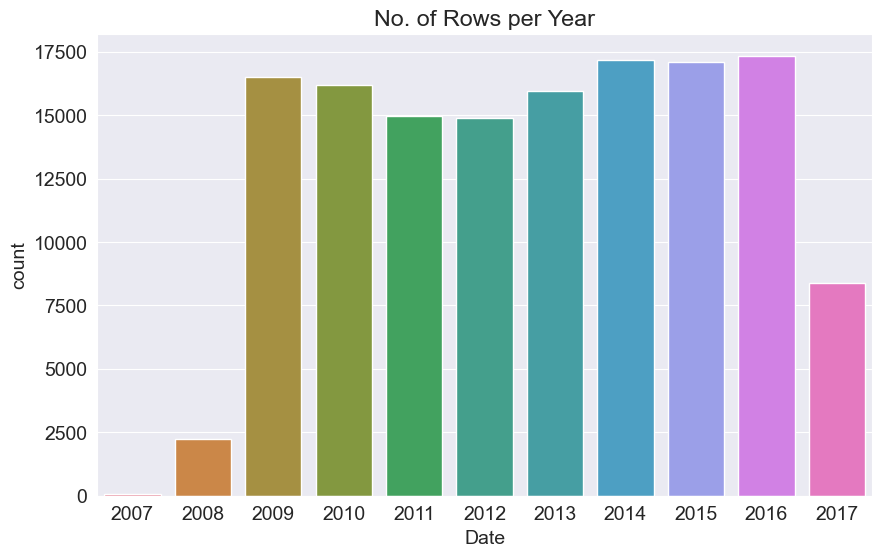

In [28]:
plt.title("No. of Rows per Year")
sns.countplot(x=pd.to_datetime(df.Date).dt.year,palette="husl")

    For the current dataset, we can use the Date column in the dataset to create another column for year. We'll pick the last two years for the test set, and one year before it for the validation set.

In [30]:
year=pd.to_datetime(df.Date).dt.year
train_df=df[year<2015]
val_df=df[year==2015]
test_df=df[year>2015]

In [31]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


    While not a perfect 60-20-20 split, we have ensured that the test validation and test sets both contain data for all 12 months of the year.

In [33]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,2014-12-27,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,...,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No,No
144549,2014-12-28,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,...,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No,No
144550,2014-12-29,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,...,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No,No
144551,2014-12-30,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,...,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No,No


In [34]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2133,2015-01-01,Albury,11.4,33.5,0.0,NaN,NaN,WSW,30.0,ESE,...,45.0,14.0,1013.5,1011.0,NaN,NaN,21.0,32.7,No,No
2134,2015-01-02,Albury,15.5,39.6,0.0,NaN,NaN,NE,56.0,ESE,...,45.0,12.0,1016.0,1012.4,NaN,NaN,25.6,38.2,No,No
2135,2015-01-03,Albury,17.1,38.3,0.0,NaN,NaN,NNE,48.0,NE,...,35.0,19.0,1017.9,1012.3,NaN,NaN,29.2,37.0,No,No
2136,2015-01-04,Albury,26.0,33.1,0.0,NaN,NaN,NNE,41.0,ESE,...,46.0,37.0,1013.6,1012.1,8.0,5.0,27.4,30.9,No,No
2137,2015-01-05,Albury,19.0,35.2,0.0,NaN,NaN,E,33.0,SSE,...,60.0,34.0,1017.4,1014.7,8.0,NaN,25.6,32.5,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144913,2015-12-27,Uluru,20.5,34.7,0.0,NaN,NaN,E,52.0,ESE,...,23.0,12.0,1013.2,1010.1,NaN,NaN,24.3,33.0,No,No
144914,2015-12-28,Uluru,18.0,36.4,0.0,NaN,NaN,ESE,54.0,E,...,17.0,7.0,1014.7,1010.9,NaN,NaN,26.7,35.0,No,No
144915,2015-12-29,Uluru,17.5,37.1,0.0,NaN,NaN,E,56.0,E,...,12.0,7.0,1012.6,1007.5,NaN,NaN,28.1,34.7,No,No
144916,2015-12-30,Uluru,20.0,38.9,0.0,NaN,NaN,E,59.0,E,...,12.0,12.0,1007.2,1002.6,NaN,1.0,31.3,38.4,No,No


In [35]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
2498,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,NaN,...,46.0,17.0,1013.4,1009.2,7.0,3.0,26.1,36.7,No,No
2499,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,SSE,...,54.0,30.0,1011.1,1008.4,8.0,8.0,24.8,31.7,No,Yes
2500,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,ESE,...,62.0,67.0,1014.0,1014.8,8.0,8.0,21.8,19.5,Yes,Yes
2501,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,SE,...,74.0,65.0,1017.9,1016.5,8.0,8.0,19.2,21.6,Yes,Yes
2502,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,SE,...,92.0,63.0,1016.3,1013.9,8.0,8.0,17.2,22.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


## Identifying Input and Target Columns
    Often, not all the columns in a dataset are useful for training a model. In the current dataset, we can ignore the Date column, since we only want to weather conditions to make a prediction about whether it will rain the next day.

    Let's create a list of input columns, and also identify the target column.

In [37]:
input_cols=list(df.columns)[1:-1]
target_col='RainTomorrow'

In [38]:
print(input_cols)

['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [39]:
target_col

'RainTomorrow'

   ### Note:
     Some cases, we may have columns which are derived from the target column. For Ex. we may have a rainfalltomorrow in millimeters column which is actually derived from RainTomorrow, we shouldn't use rainfalltomorrow in millimeters  column  as an input because we want to use a model with today's data because it will be strong indicator of RainTomorrow, but at the same time, it is derived information from RainTomorrow 
    so we should be mindful of that while using dataset and shouldn't pick any derived columns of the target column. Make sure to ignore them

    We can now create inputs and targets for the training, validation and test sets for further processing and model training. We will create a coly so that the original data is not disturbed because we may need to modify the data like scalling,encoding etc

In [42]:
train_inputs=train_df[input_cols].copy()
train_targets=train_df[target_col].copy()

In [43]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,Uluru,16.9,33.2,0.0,NaN,NaN,SSE,43.0,ESE,SSE,...,26.0,22.0,13.0,1014.1,1009.8,NaN,NaN,23.7,31.8,No
144549,Uluru,15.1,36.8,0.0,NaN,NaN,NE,31.0,ENE,SW,...,20.0,16.0,8.0,1012.6,1007.6,NaN,NaN,28.9,34.8,No
144550,Uluru,17.3,37.8,0.0,NaN,NaN,ESE,39.0,ESE,SSE,...,9.0,15.0,8.0,1011.9,1008.0,NaN,NaN,29.7,35.7,No
144551,Uluru,20.1,38.5,0.0,NaN,NaN,ESE,43.0,ESE,SSW,...,17.0,22.0,9.0,1014.0,1009.2,NaN,NaN,29.8,37.2,No


In [44]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

In [45]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [46]:
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

    Let's also identify which of the columns are numerical and which ones are categorical. This will be useful later, as we'll need to convert the categorical data to numbers for training a logistic regression model.

In [48]:
numeric_cols=train_inputs.select_dtypes(np.number).columns.tolist()
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [360]:
categorical_cols=train_inputs.select_dtypes(object).columns.tolist()
categorical_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

    Let's view some statistics for the numeric columns.

In [51]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


    Do the ranges of the numeric columns seem reasonable? If not, we may have to do some data cleaning as well.

    Let's also check the number of categories in each of the categorical columns.



In [53]:
train_inputs[categorical_cols].nunique()


Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

# Imputing Missing Numeric Data
    Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.
<img src="imputation.png">
    
    There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the SimpleImputer class from sklearn.impute.

In [55]:
from sklearn.impute import SimpleImputer

In [56]:
imputer=SimpleImputer(strategy='mean') 
#if you think that there are outlier that may affaect the average use Median instead of Mean
#For Ex. if you have an income column, it's always good idea to replace it with Median rather the Mean because there will be outlier that may affaect the average

In [57]:
#To check other staragies availabe 
# ?SimpleImputer

    Before we perform imputation, let's check the no. of missing values in each numeric column.

In [59]:
df[numeric_cols].isna().sum()

MinTemp            468
MaxTemp            307
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustSpeed     9105
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Pressure3pm      13769
Cloud9am         52625
Cloud3pm         56094
Temp9am            656
Temp3pm           2624
dtype: int64

    These values are spread across the training, test and validation sets. You can also check the no. of missing values individually for train_inputs, val_inputs and test_inputs.

In [61]:
train_inputs[numeric_cols].isna().sum()

MinTemp            314
MaxTemp            187
Rainfall             0
Evaporation      36331
Sunshine         40046
WindGustSpeed     6828
WindSpeed9am       874
WindSpeed3pm      1069
Humidity9am       1052
Humidity3pm       1116
Pressure9am       9112
Pressure3pm       9131
Cloud9am         34988
Cloud3pm         36022
Temp9am            574
Temp3pm            596
dtype: int64

    The first step in imputation is to fit the imputer to the data i.e. compute the chosen statistic (e.g. mean) for each column in the dataset.

In [63]:
imputer.fit(df[numeric_cols])

SimpleImputer()

    After calling fit, the computed statistic for each column is stored in the statistics_ property of imputer.

In [65]:
print(numeric_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [66]:
list(imputer.statistics_) 
#it will show what are the avg for the given numeric columns
#Ex for MinTemp the avg is 12.18

[12.18482386562048,
 23.235120301822324,
 2.349974074310839,
 5.472515506887154,
 7.630539861047281,
 39.97051988882308,
 13.990496092519967,
 18.631140782316862,
 68.82683277087672,
 51.44928834695453,
 1017.6545771543717,
 1015.2579625879797,
 4.431160817585808,
 4.499250233195188,
 16.98706638787991,
 21.69318269001107]

The missing values in the training, test and validation sets can now be filled in using the transform method of imputer.

In [68]:
imputer.transform(train_inputs[numeric_cols])
# the output is numeric array which we can put it in the numeric columns

array([[13.4       , 22.9       ,  0.6       , ...,  4.49925023,
        16.9       , 21.8       ],
       [ 7.4       , 25.1       ,  0.        , ...,  4.49925023,
        17.2       , 24.3       ],
       [12.9       , 25.7       ,  0.        , ...,  2.        ,
        21.        , 23.2       ],
       ...,
       [17.3       , 37.8       ,  0.        , ...,  4.49925023,
        29.7       , 35.7       ],
       [20.1       , 38.5       ,  0.        , ...,  4.49925023,
        29.8       , 37.2       ],
       [22.5       , 39.6       ,  0.        , ...,  4.49925023,
        30.1       , 37.4       ]])

In [69]:
train_inputs[numeric_cols]=imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

The missing values are now filled in with the mean of each column.

In [71]:
train_inputs[numeric_cols]
#Now we can see there is no NaN values

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8
1,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3
2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2
3,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5
4,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,5.472516,7.63054,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,4.431161,4.49925,23.7,31.8
144549,15.1,36.8,0.0,5.472516,7.63054,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,4.431161,4.49925,28.9,34.8
144550,17.3,37.8,0.0,5.472516,7.63054,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,4.431161,4.49925,29.7,35.7
144551,20.1,38.5,0.0,5.472516,7.63054,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,4.431161,4.49925,29.8,37.2


In [72]:
train_inputs[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

# Scaling Numeric Features
    Another good practice is to scale numeric features to a small range of values e.g.(0,1) or (−1,1). Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

    The numeric columns in our dataset have varying ranges.

In [74]:
df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


We Scale the data just to give a level playing filed, just becuase we measure column like rainfll in a certain unit where it get large values,but we measure a temperature in certin unit where it gets lower values. Which may impcat model 

    Let's use MinMaxScaler from sklearn.preprocessing to scale values to the (0,1) range.

In [77]:
from sklearn.preprocessing import MinMaxScaler

In [78]:
# ?MinMaxScaler

In [79]:
scaler=MinMaxScaler()

    The objective of the MinMaxScalar is to identify for ecah column what is the minimum and what is the maximum and then scale the values in the column so that they all line range 0 t0 1

    First, we fit the scaler to the data i.e. compute the range of values for each numeric column.

In [82]:
scaler.fit(df[numeric_cols])

MinMaxScaler()

    We can now inspect the minimum and maximum values in each column.

In [84]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[-8.5,
 -4.8,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 0.0,
 0.0,
 0.0,
 980.5,
 977.1,
 0.0,
 0.0,
 -7.2,
 -5.4]

In [85]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[33.9,
 48.1,
 371.0,
 145.0,
 14.5,
 135.0,
 130.0,
 87.0,
 100.0,
 100.0,
 1041.0,
 1039.6,
 9.0,
 9.0,
 40.2,
 46.7]

    We can now separately scale the training, validation and test sets using the transform method of scaler.



In [87]:
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

    We can now verify that values in each column lie in the range (0,1)

In [89]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.525947,0.006396,0.036949,0.525366,0.265107,0.108395,0.215668,0.686309,0.514693,0.612014,0.608705,0.483192,0.493693,0.507089,0.517103
std,0.149458,0.131904,0.022962,0.021628,0.200931,0.102420,0.068800,0.101424,0.189008,0.206376,0.111335,0.106611,0.255486,0.238028,0.134722,0.130726
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.540800,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037741,0.526244,0.255814,0.100000,0.218391,0.690000,0.520000,0.614125,0.610527,0.492351,0.499917,0.502110,0.506718
75%,0.591981,0.618147,0.002156,0.038621,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.682645,0.675200,0.666667,0.666667,0.601266,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [90]:
train_inputs[numeric_cols]
#we can now see all these values are nice and small. All of these are between 0 to 1

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.037741,0.526244,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.499917,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037741,0.526244,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.492351,0.499917,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037741,0.526244,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.492351,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037741,0.526244,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.492351,0.499917,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037741,0.526244,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.718336,0.000000,0.037741,0.526244,0.286822,0.184615,0.298851,0.22,0.13,0.555372,0.5232,0.492351,0.499917,0.651899,0.714012
144549,0.556604,0.786389,0.000000,0.037741,0.526244,0.193798,0.146154,0.229885,0.16,0.08,0.530579,0.4880,0.492351,0.499917,0.761603,0.771593
144550,0.608491,0.805293,0.000000,0.037741,0.526244,0.255814,0.200000,0.103448,0.15,0.08,0.519008,0.4944,0.492351,0.499917,0.778481,0.788868
144551,0.674528,0.818526,0.000000,0.037741,0.526244,0.286822,0.215385,0.195402,0.22,0.09,0.553719,0.5136,0.492351,0.499917,0.780591,0.817658


# Encoding Categorical Data
    Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

    One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [92]:
df[categorical_cols].nunique()

Location       49
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

    We can perform one hot encoding using the OneHotEncoder class from sklearn.preprocessing.

In [94]:
from sklearn.preprocessing import OneHotEncoder

In [95]:
#?OneHotEncoder

In [96]:
encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')

    First, we fit the encoder to the data i.e. identify the full list of categories across all categorical columns.

In [98]:
# Fit on ALL categorical columns (e.g., ['Location', 'WindDir3pm', 'RainToday'])
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [99]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'W', 'WNW', 'WSW', nan], dtype=object),
 ar

    The encoder has created a list of categories for each of the categorical columns in the dataset.

    We can generate column names for each individual category using get_feature_names.

In [101]:
# Dynamically get column names after encoding
encoded_cols=list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

    All of the above columns will be added to train_inputs, val_inputs and test_inputs.

    To perform the encoding, we use the transform method of encoder.

In [103]:
encoder.transform(train_inputs[categorical_cols])

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [104]:
train_inputs[encoded_cols]=encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\258940059.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\258940059.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\258940059.py:1: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

    1.encoder.transform(train_inputs[categorical_cols])
    This applies the OneHotEncoder (which you already fitted on your categorical columns) to train_inputs[categorical_cols].

    It converts categories into one-hot encoded vectors (i.e., 0s and 1s for each category).

    2.train_inputs[encoded_cols] = ...
    encoded_cols is a list of the column names generated by encoder.get_feature_names_out(...)
    You’re adding these new columns to train_inputs by assigning the transformed NumPy array.

In [106]:
test_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
2498,Albury,0.681604,0.801512,0.000000,0.037741,0.526244,ENE,0.372093,NaN,ESE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2499,Albury,0.693396,0.725898,0.001078,0.037741,0.526244,SSE,0.341085,SSE,SE,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,Albury,0.634434,0.527410,0.005930,0.037741,0.526244,ENE,0.325581,ESE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2501,Albury,0.608491,0.538752,0.042049,0.037741,0.526244,SSE,0.255814,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2502,Albury,0.566038,0.523629,0.018329,0.037741,0.526244,ENE,0.193798,SE,SSE,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,0.283019,0.502836,0.000000,0.037741,0.526244,E,0.193798,ESE,E,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145455,Uluru,0.266509,0.533081,0.000000,0.037741,0.526244,E,0.193798,SE,ENE,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145456,Uluru,0.285377,0.568998,0.000000,0.037741,0.526244,NNW,0.124031,SE,N,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
145457,Uluru,0.327830,0.599244,0.000000,0.037741,0.526244,N,0.240310,SE,WNW,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [107]:
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 123)
train_targets: (97988,)
val_inputs: (17089, 123)
val_targets: (17089,)
test_inputs: (25710, 123)
test_targets: (25710,)


# Training a Logistic Regression Model
    To train a logistic regression model, we can use the LogisticRegression class from Scikit-learn.

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
#?LogisticRegression

In [213]:
model=LogisticRegression(solver='liblinear')


    We can train the model using model.fit.

In [215]:
model.fit(train_inputs[numeric_cols+encoded_cols],train_targets)

LogisticRegression(solver='liblinear')

    Let's check the weights and biases of the trained model.

In [217]:
print(numeric_cols+encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [223]:
print(model.coef_.shape)

(1, 118)


In [239]:

weights=pd.DataFrame({'feature':numeric_cols+encoded_cols,
                     'weight':model.coef_[0]})
weights

,feature,weight
0,MinTemp,0.898630
1,MaxTemp,-2.879916
2,Rainfall,3.162778
3,Evaporation,0.854247
4,Sunshine,-1.671395
...,...,...
113,WindDir3pm_WNW,-0.033500
114,WindDir3pm_WSW,-0.275975
115,WindDir3pm_nan,0.074933
116,RainToday_No,-1.473518


In [241]:
print(model.intercept_)

[-2.44955699]


    Each weight is applied to the value in a specific column of the input. Higher the weight, greater the impact of the column on the prediction.

In [276]:
top_weights = weights.sort_values(by='weight', ascending=False).head(10).iloc[::-1]

fig = px.bar(
    top_weights,
    x='weight',
    y='feature',
    orientation='h',
    color='weight',
    color_continuous_scale='Tealrose',
    title='🔝 Top 10 Important Features'
)

fig.update_layout(
    height=500,
    yaxis=dict(tickfont=dict(size=12)),
    xaxis_title='Weight',
    yaxis_title='Feature',
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()

# Making Predictions and Evaluating the Model
    We can now use the trained model to make predictions on the training, test

In [278]:
x_train=train_inputs[numeric_cols+encoded_cols]
x_val=val_inputs[numeric_cols+encoded_cols]
x_test=test_inputs[numeric_cols+encoded_cols]

In [280]:
train_preds=model.predict(x_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [282]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 97988, dtype: object

    We can output a probabilistic prediction using predict_proba.

In [285]:
train_probs=model.predict_proba(x_train)
train_probs

array([[0.94401187, 0.05598813],
       [0.9407418 , 0.0592582 ],
       [0.96093644, 0.03906356],
       ...,
       [0.98749115, 0.01250885],
       [0.98334684, 0.01665316],
       [0.87453434, 0.12546566]])

    The numbers above indicate the probabilities for the target classes "No" and "Yes".
    for Ex [0.94401187, 0.05598813] from this the probability of 'NO' higher 94%, that's why we gor the prediction as 'NO'

In [289]:
model.classes_

array(['No', 'Yes'], dtype=object)

    We can test the accuracy of the model's predictions by computing the percentage of matching values in train_preds and train_targets.

    This can be done using the accuracy_score function from sklearn.metrics.

In [292]:
from sklearn.metrics import accuracy_score

In [294]:
accuracy_score(train_targets,train_preds)

0.8519206433440829

    The model achieves an accuracy of 85.1% on the training set. We can visualize the breakdown of correctly and incorrectly classified inputs using a confusion matrix.
<img src='confusion matrix.png'>

In [300]:
from sklearn.metrics import confusion_matrix

In [306]:
confusion_matrix(train_targets,train_preds,normalize='true')

array([[0.94621341, 0.05378659],
       [0.4776585 , 0.5223415 ]])

    Let's define a helper function to generate predictions, compute the accuracy score and plot a confusion matrix for a given st of inputs.

In [376]:
def predict_and_plot(inputs,targets,name):
    preds=model.predict(inputs)
    
    accuracy=accuracy_score(targets,preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf=confusion_matrix(targets,preds,normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));

    return preds

Accuracy: 85.19%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

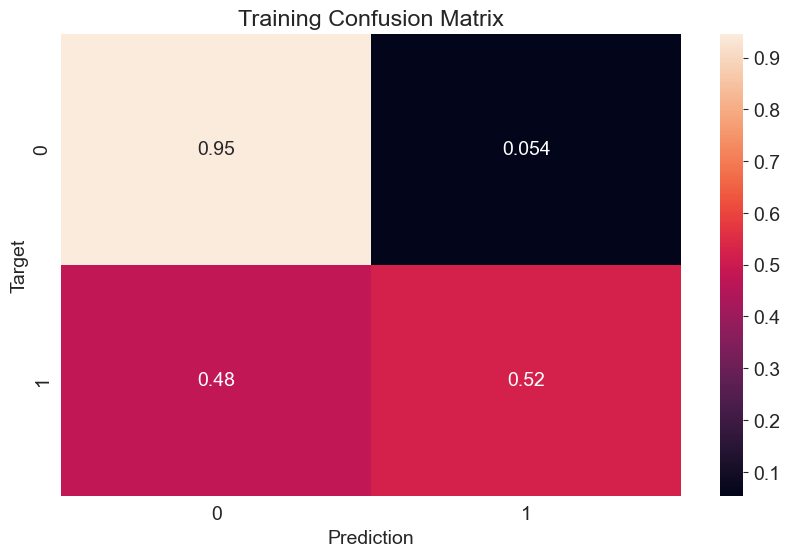

In [321]:
predict_and_plot(x_train,train_targets, 'Training')

Accuracy: 85.40%


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

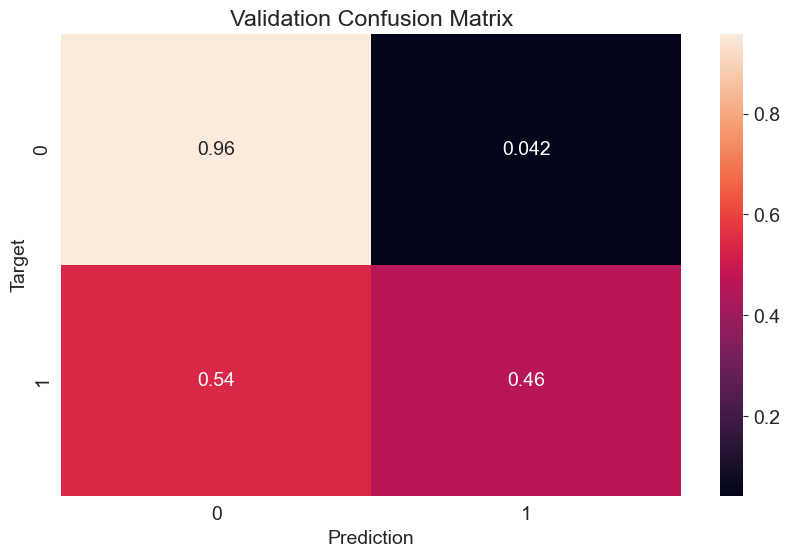

In [323]:
predict_and_plot(x_val,val_targets,'Validation')

Accuracy: 84.20%


array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

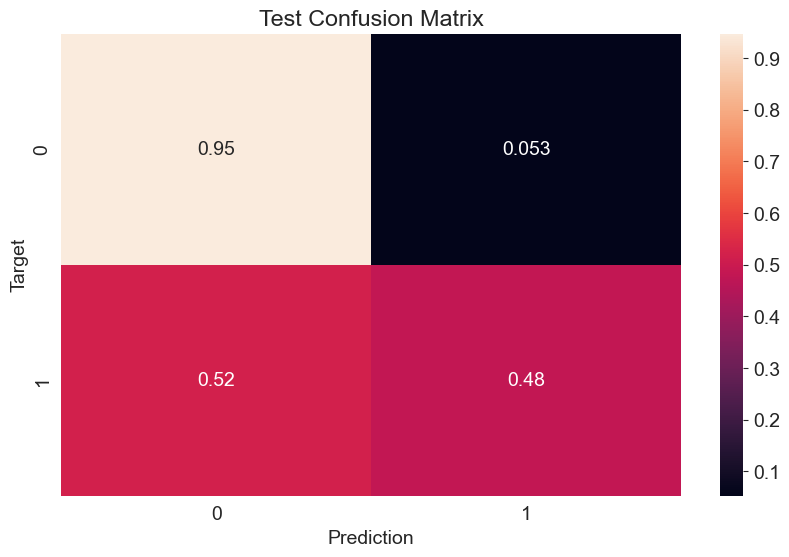

In [325]:
predict_and_plot(x_test,test_targets,'Test')

    The accuracy of the model on the test and validation set are above 84%, which suggests that our model generalizes well to data it hasn't seen before.

    But how good is 84% accuracy? While this depends on the nature of the problem and on business requirements, a good way to verify whether a model has actually learned something useful is to compare its results to a "random" or "dumb" model.

    Let's create two models: one that guesses randomly and another that always return "No". Both of these models completely ignore the inputs given to them.

In [328]:
def random_guess(inputs):
    return np.random.choice(['No','Yes'],len(inputs))

In [337]:
def all_no(inputs):
    return np.full(len(inputs),'No')

    Let's check the accuracies of these two models on the test set.

In [342]:
accuracy_score(test_targets,random_guess(x_test))

0.5010112796577207

In [339]:
accuracy_score(test_targets,all_no(x_test))

0.7734344612991054

    Our random model achieves an accuracy of 50% and our "always No" model achieves an accuracy of 77%.

    Thankfully, our model is better than a "dumb" or "random" model! This is not always the case, so it's a good practice to benchmark any model you train against such baseline models.

# Making Predictions on a Single Input
    Once the model has been trained to a satisfactory accuracy, it can be used to make predictions on new data. Consider the following dictionary containing data collected from the Katherine weather department today.

In [349]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

    The first step is to convert the dictionary into a Pandas dataframe, similar to raw_df. This can be done by passing a list containing the given dictionary to the pd.DataFrame constructor.

In [353]:
new_df=pd.DataFrame([new_input])
new_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,...,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


    We've now created a Pandas dataframe with the same columns as raw_df (except RainTomorrow, which needs to be predicted). The dataframe contains just one row of data, containing the given input.

    We must now apply the same transformations applied while training the model:

>Imputation of missing values using the imputer created earlier

>Scaling numerical features using the scaler created earlier

>Encoding categorical features using the encoder created earlier

In [362]:
new_df[numeric_cols]=imputer.transform(new_df[numeric_cols])
new_df[numeric_cols]=scaler.transform(new_df[numeric_cols])
new_df[encoded_cols]=encoder.transform(new_df[categorical_cols])

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\1551935161.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\1551935161.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\1551935161.py:3: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

In [366]:
new_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,2021-06-19,Katherine,0.747642,0.718336,0.027493,0.028966,0.526244,NNW,0.356589,NW,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [372]:
x_new_input=new_df[numeric_cols+encoded_cols]
x_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.747642,0.718336,0.027493,0.028966,0.526244,0.356589,0.1,0.229885,0.89,0.58,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


    Our model predicts that it will rain tomorrow in Katherine! We can also check the probability of the prediction.

In [390]:
prediction=model.predict(x_new_input)[0]
prediction

'Yes'

In [396]:
model.predict_proba(x_new_input)[0]

array([0.48103072, 0.51896928])

    Looks like our model isn't too confident about its prediction!

Let's define a helper function to make predictions for individual inputs.

In [409]:
def predict_input(single_input):
    input_new_df=pd.DataFrame([single_input])
    input_new_df[numeric_cols]=imputer.transform(input_new_df[numeric_cols])
    input_new_df[numeric_cols]=scaler.transform(input_new_df[numeric_cols])
    input_new_df[encoded_cols]=encoder.transform(input_new_df[categorical_cols])
    X_input=input_new_df[numeric_cols+encoded_cols]
    pred=model.predict(X_input)[0]
    prob=model.predict_proba(X_input)[0]
    return pred,prob

    We can now use this function to make predictions for individual inputs.

In [401]:
new_input = {'Date': '2021-06-19',
             'Location': 'Launceston',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [411]:
predict_input(new_input)

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\918921038.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\918921038.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

C:\Users\amrit\AppData\Local\Temp\ipykernel_16048\918921038.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented fra

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [405]:
#Better version of code

def predict(single_input):
    input_new_df = pd.DataFrame([single_input])
    
    # Process numeric features
    num_data = pd.DataFrame(imputer.transform(input_new_df[numeric_cols]), columns=numeric_cols)
    num_data = pd.DataFrame(scaler.transform(num_data), columns=numeric_cols)
    
    # Process categorical features
    cat_data = pd.DataFrame(encoder.transform(input_new_df[categorical_cols]), columns=encoded_cols)
    
    # Combine all features
    X_input = pd.concat([num_data, cat_data], axis=1)
    
    # Predict
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0]
    
    return pred, prob

In [407]:
predict(new_input)

('Yes', array([0.35250754, 0.64749246]))